# Recommender System - Tensor Flow

## 1. Prerequisites

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline


import tensorflow as tf
import scipy
import scipy.io
import scipy.sparse as sp

from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
from helpers import load_data

DATA_TRAIN_PATH = "data/data_train.csv"
ratings = load_data(DATA_TRAIN_PATH)

DATA_TEST_PATH = "data/sampleSubmission.csv"
samples = load_data(DATA_TEST_PATH)

number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000


In [3]:
from sklearn.model_selection import train_test_split
from helpers import convert_train


data, n_users, n_movies = convert_train(ratings)
train, test = train_test_split(data, test_size=0.1, random_state=42)

submission,_,_=convert_train(samples)


In [21]:
data.head()

,user_id,movie_id,rating
0,0,9,5
1,0,60,5
2,0,67,4
3,0,83,4
4,0,205,2


## 2. Creating Neural Network

In [4]:
# Creating movie embedding path
movie_input = Input(shape = [1], name = "Movies-Input")
movie_embedding = Embedding(n_movies + 1, 5, name = "Movies-Embedding")(movie_input)
movie_vec = Flatten(name = "Flatten-Movies")(movie_embedding)

# Creating user embedding path
user_input = Input(shape = [1], name = "User-Input")
user_embedding = Embedding(n_users + 1, 5, name = "User-Embedding")(user_input)
user_vec = Flatten(name = "Flatten-Users")(user_embedding)

# Concatenate features
conc = Concatenate()([movie_vec, user_vec])

# Add fully-connected-layers
fc1 = Dense(128, activation = 'relu') (conc)
fc2 = Dense(32, activation = 'relu') (fc1)
out = Dense(1)(fc2)

# Create model and compile
model = Model([user_input, movie_input], out)
model.compile('adam', 'mean_squared_error')


Epoch 1/150
1059256/1059256 [==============================] - 12s 11us/step - loss: 1.1448
Epoch 2/150
1059256/1059256 [==============================] - 10s 10us/step - loss: 1.0016
Epoch 3/150
1059256/1059256 [==============================] - 10s 10us/step - loss: 0.9858
Epoch 4/150
1059256/1059256 [==============================] - 10s 10us/step - loss: 0.9760
Epoch 5/150
1059256/1059256 [==============================] - 10s 10us/step - loss: 0.9681
Epoch 6/150
1059256/1059256 [==============================] - 10s 10us/step - loss: 0.9599
Epoch 7/150
1059256/1059256 [==============================] - 10s 10us/step - loss: 0.9533
Epoch 8/150
1059256/1059256 [==============================] - 10s 10us/step - loss: 0.9480
Epoch 9/150
1059256/1059256 [==============================] - 11s 10us/step - loss: 0.9438
Epoch 10/150
1059256/1059256 [==============================] - 11s 10us/step - loss: 0.9379
Epoch 11/150
1059256/1059256 [==============================] - 11s 10us/step 

1059256/1059256 [==============================] - 8s 8us/step - loss: 0.8547
Epoch 88/150
1059256/1059256 [==============================] - 8s 8us/step - loss: 0.8545
Epoch 89/150
1059256/1059256 [==============================] - 8s 8us/step - loss: 0.8541
Epoch 90/150
1059256/1059256 [==============================] - 8s 8us/step - loss: 0.8538
Epoch 91/150
1059256/1059256 [==============================] - 8s 8us/step - loss: 0.8536
Epoch 92/150
1059256/1059256 [==============================] - 8s 8us/step - loss: 0.8533
Epoch 93/150
1059256/1059256 [==============================] - 8s 8us/step - loss: 0.8529
Epoch 94/150
1059256/1059256 [==============================] - 8s 8us/step - loss: 0.8526
Epoch 95/150
1059256/1059256 [==============================] - 8s 8us/step - loss: 0.8525
Epoch 96/150
1059256/1059256 [==============================] - 8s 8us/step - loss: 0.8520
Epoch 97/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 0.8519
Epoch 98/150

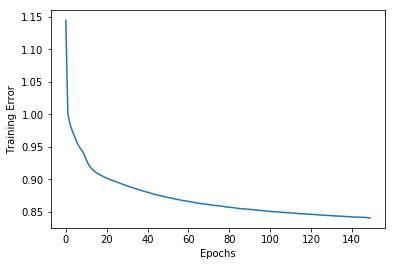

In [5]:
from keras.models import load_model

if os.path.exists('regression_model_neural_network.h5'):
    model = load_model('regression_model_neural_network.h5')
else:
    history = model.fit([train.user_id, train.movie_id], train.rating, epochs=150,batch_size=200 ,verbose=1)
    model.save('regression_model_neural_network.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [6]:
scores = model.evaluate([test.user_id, test.movie_id], test.rating)

predictions = model.predict([test.user_id, test.movie_id])

print("Accuracy: %.2f%%" % (scores*100))

predictions_dot= model.predict([submission.user_id, submission.movie_id])

117696/117696 [==============================] - 2s 16us/step
Accuracy: 106.61%


In [7]:
predictions_dot = np.array([a[0] for a in predictions_dot])
prediction_dot = np.rint(predictions_dot)

prediction_dot = np.where(prediction_dot < 0, 0, prediction_dot)
prediction_dot = np.where(prediction_dot > 5, 5, prediction_dot)



submission.drop('rating',axis = 1, inplace = True)
submission['rating'] = prediction_dot

In [8]:
from helpers import load_csv
export_csv = load_csv('data/prediction_neural_network',submission)